inputs: - The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

Importing necessary libraries right now. There are few more which will be imported later. 

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


The dataset is loaded and converted to a DataFrame using python library. 

We can check that this dataset has 158 rows × 12 columns. The output or Y label/dependant variable is the happiness score that we need to predict and rest are input or independant variables.

In [44]:
new_data = df.drop(['Country','Region','Happiness Rank'], axis = 1)
new_data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


From the above dataset we can observe that first three columns that is countary, region and hapiness rank arent contributing to the label. So, we can drop these columns and proceed. So, we have dropped these columns in the above steps and proceed further. 


In [45]:
new_data.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

So, this specifies that our data doesn't have any null values present. 

In [46]:
new_data.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We can see that all the values are in same dataformat. 

Happiness Score                      AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Standard Error                    AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Economy (GDP per Capita)          AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Family                            AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Health (Life Expectancy)          AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Freedom                           AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Trust (Government Corruption)     AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Generosity                          AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Dystopia Residual                AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
dtype: object

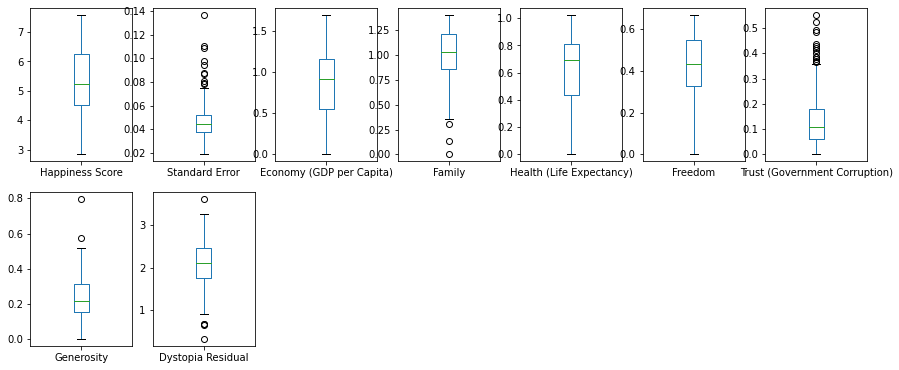

In [47]:
new_data.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

The above plot shows that several columns contains some outliers in them:- For Eg, Standard error, Trust and Dystopia residual. 

<AxesSubplot:>

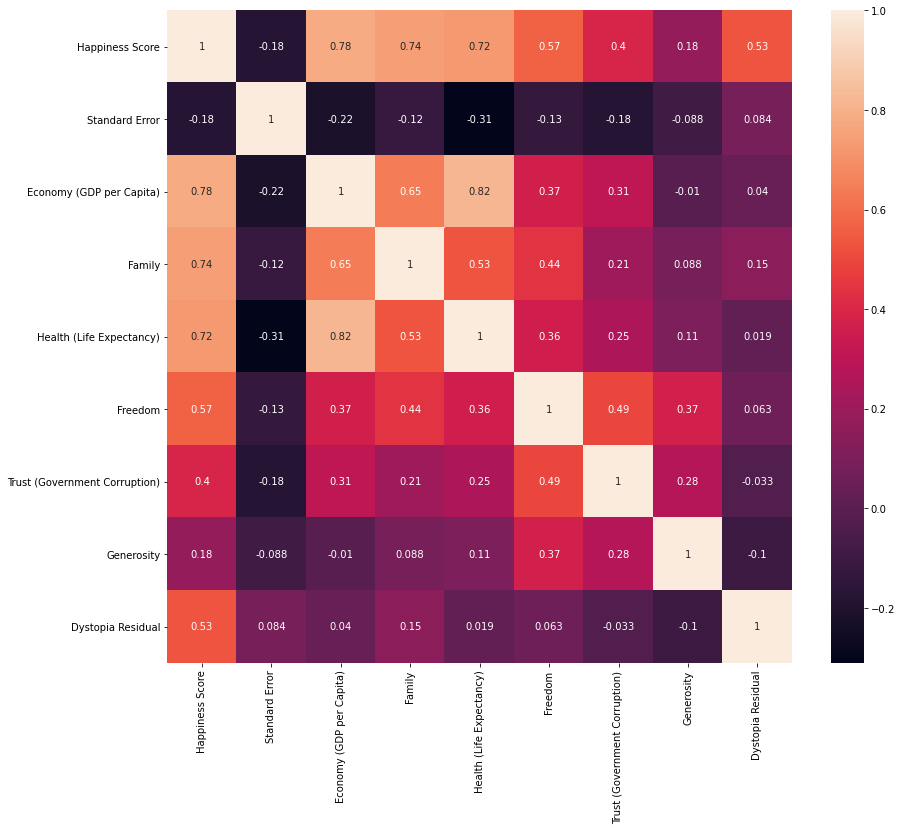

In [48]:
plt.figure(figsize=(14,12))
sns.heatmap(new_data.corr(), annot = True)

From the heatmap representation of the correlation function we can see that our label(y) is highly(positively) related to the Economy, Familya and Health. 

It is negatively related to the standard error, hence will drop this column. 

In [49]:
data_a = new_data.drop("Standard Error" , axis = 1)

In [50]:
data_a.shape

(158, 8)

In [51]:
data_a.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Data is a bit skeewed but not much so will continue. 

In [52]:
new_data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We have droped the column from the dataset and created a new dataset which now have 158 roes and 8 columns. 

In [53]:
x = data_a.iloc[:,1:8]
x.shape

(158, 7)

In [54]:
y = data_a.iloc[:,0]

In [55]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [56]:
y = y.values.reshape(-1,1)

In [57]:
x.shape

(158, 7)

In [58]:
y.shape

(158, 1)

We now have divided our dataset in to x and y where x => all the independant variables, input variable and y => all the dependamnt variables. 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 30)

In [89]:
lr = LinearRegression()

In [62]:
print(x_test.shape)
print(y_test.shape)

(48, 7)
(48, 1)


In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
predict_lr = lr.predict(x_test)

We have created the model and added the values to it. 

In [80]:
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,predict_lr))
print('Means Squared Error',mean_squared_error(y_test,predict_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,predict_lr)))

Error Calculations: -
Means absolute error 0.00024872083741127776
Means Squared Error 8.08857196500374e-08
Root mean square 0.000284404148440274


In [81]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict_lr))

0.9999999475365464


In [84]:
dc = DecisionTreeRegressor()
dc

DecisionTreeRegressor()

In [79]:
dc.fit(x_test,y_test)
pridict_dc = dc.predict(x_test)

In [83]:
print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_dc))
print('Means Squared Error',mean_squared_error(y_test,pridict_dc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_dc)))
print('Model Score',r2_score(y_test,pridict_dc))

Error Calculations:-
Means absolute error 0.0
Means Squared Error 0.0
Root mean square 0.0
Model Score 1.0


In [87]:
dc = DecisionTreeRegressor(splitter='random',min_samples_split = 10,max_features = "sqrt")
dc

DecisionTreeRegressor(max_features='sqrt', min_samples_split=10,
                      splitter='random')

In [88]:
dc.fit(x_test,y_test)
pridict_dc = dc.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_dc))
print('Means Squared Error',mean_squared_error(y_test,pridict_dc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_dc)))
print('Model Score',r2_score(y_test,pridict_dc))

Error Calculations:-
Means absolute error 0.5370690806878305
Means Squared Error 0.4544311104828041
Root mean square 0.6741150573031314
Model Score 0.7052504996635027


In [94]:
svr = SVR(kernel='rbf')
svr.fit(x_test,y_test)
pridict_sv = svr.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_sv))
print('Means Squared Error',mean_squared_error(y_test,pridict_sv))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_sv)))
print('Model Score',r2_score(y_test,pridict_sv))

Error Calculations:-
Means absolute error 0.0857210692986647
Means Squared Error 0.014029778324153017
Root mean square 0.11844736520561788
Model Score 0.9909001165292525


In [102]:
svr = SVR(kernel='poly') #model Score:94 if degree = 5, hencing moving forward with defualt = 3
svr.fit(x_test,y_test)
pridict_sv1 = svr.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_sv1))
print('Means Squared Error',mean_squared_error(y_test,pridict_sv1))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_sv1)))
print('Model Score',r2_score(y_test,pridict_sv1))

Error Calculations:-
Means absolute error 0.1495887320456087
Means Squared Error 0.03747624003516331
Root mean square 0.19358780962437513
Model Score 0.9756924586146418


In [105]:
rf = RandomForestRegressor()
rf.fit(x_test,y_test)
pridict_rf = rf.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_rf))
print('Means Squared Error',mean_squared_error(y_test,pridict_rf))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_rf)))
print('Model Score',r2_score(y_test,pridict_rf))

Error Calculations:-
Means absolute error 0.13570437499999938
Means Squared Error 0.03579525717708321
Root mean square 0.18919634557010664
Model Score 0.9767827643751056


In [109]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(x_test,y_test)
pridict_rf = rf.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_rf))
print('Means Squared Error',mean_squared_error(y_test,pridict_rf))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_rf)))
print('Model Score',r2_score(y_test,pridict_rf))

Error Calculations:-
Means absolute error 0.13330781249999982
Means Squared Error 0.03121633322343717
Root mean square 0.1766814456116917
Model Score 0.9797527096897696


In [111]:
from sklearn.model_selection import GridSearchCV

In [129]:
parameters = { 'kernel' :['linear', 'poly', 'rbf', 'sigmoid']}

grid_cv = GridSearchCV(estimator=svr, param_grid = parameters)

In [130]:
grid_cv.fit(x_test, y_test)

GridSearchCV(estimator=SVR(kernel='poly'),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [131]:
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

{'kernel': 'linear'}
0.9951060653928512
1.0
